### Oklahoma Induced Earthquakes

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from stat_functions import *

In [2]:
# earthquakes detected in the Oklahoma region from 1950 to 2016.
# The magnitudes of all earthquakes in the region from the ANSS ComCat.
data_eq = pd.read_csv('oklahoma_earthquakes_1950-2017.csv')
data_eq.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,depthError,magError,magNst,status,locationSource,magSource,loc_name,loc_admin1,loc_admin2,loc_cc
0,1974-12-16 02:30:21.400,35.330,-97.480,10.0,2.6,ml,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,reviewed,m,tul,Moore,Oklahoma,Cleveland County,US
1,1975-09-13 01:25:02.800,34.139,-97.369,5.0,3.4,lg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,reviewed,us,tul,Wilson,Oklahoma,Carter County,US
2,1975-10-12 02:58:11.200,34.816,-97.406,20.0,3.2,lg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,reviewed,us,tul,Maysville,Oklahoma,Garvin County,US
3,1975-11-29 14:29:40.900,34.521,-97.347,5.0,3.5,lg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,reviewed,us,slm,Wynnewood,Oklahoma,Garvin County,US
4,1976-04-16 18:59:44.200,36.107,-99.875,5.0,3.4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,reviewed,us,tul,Arnett,Oklahoma,Ellis County,US


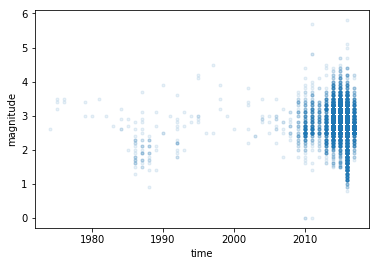

In [3]:
data_eq['year'] = pd.DatetimeIndex(data_eq['time']).year
data_eq['month'] = pd.DatetimeIndex(data_eq['time']).month
data_eq['day'] = pd.DatetimeIndex(data_eq['time']).day

plt.plot(data_eq['year'], data_eq['mag'], marker='.', linestyle='none', alpha=0.1)
plt.xlabel('time')
plt.ylabel('magnitude')
plt.show()

In [4]:
dt_pre = data_eq[data_eq['year']<= 2009]
 
preyr = data_eq['year'][data_eq['year']<= 2009]
premn = data_eq['month'][data_eq['year']<= 2009]
predy = data_eq['day'][data_eq['year']<= 2009]

gapyr = np.zeros(len(preyr))
gapmn = np.zeros(len(premn))
gapdy = np.zeros(len(predy))

for i in range(len(preyr)-1):
    gapyr[i] = preyr.iloc[i+1] - preyr.iloc[i]
    gapmn[i] = premn.iloc[i+1] - premn.iloc[i]
    gapdy[i] = predy.iloc[i+1] - predy.iloc[i]

timegap_pre = []
timegap_pre = gapyr*12*30 + gapmn*30 + gapdy
timegap_pre

array([2.670e+02, 2.900e+01, 4.700e+01, 1.370e+02, 3.000e+00, 1.128e+03,
       9.600e+01, 4.090e+02, 2.490e+02, 2.920e+02, 3.080e+02, 2.950e+02,
       2.700e+01, 3.000e+01, 2.570e+02, 3.030e+02, 4.400e+01, 5.400e+01,
       4.300e+01, 1.000e+01, 4.100e+01, 2.400e+01, 1.000e+00, 2.500e+01,
       6.000e+00, 1.000e+00, 8.000e+00, 2.000e+01, 2.600e+01, 3.600e+01,
       2.000e+00, 5.800e+01, 2.400e+01, 0.000e+00, 1.000e+00, 1.100e+01,
       6.000e+00, 7.000e+00, 2.000e+00, 2.000e+00, 1.100e+01, 4.000e+00,
       7.000e+00, 7.000e+00, 1.000e+01, 1.500e+01, 7.000e+00, 1.800e+01,
       6.100e+01, 2.000e+00, 0.000e+00, 1.100e+01, 3.000e+00, 1.000e+00,
       5.000e+00, 1.100e+01, 1.100e+01, 1.570e+02, 1.000e+00, 1.000e+00,
       0.000e+00, 8.000e+00, 4.400e+01, 4.900e+01, 5.000e+00, 6.000e+00,
       2.100e+01, 4.400e+01, 9.000e+00, 7.000e+00, 1.400e+01, 1.900e+01,
       3.500e+01, 1.900e+01, 1.000e+01, 5.000e+00, 9.000e+00, 1.000e+00,
       1.140e+02, 1.300e+01, 3.000e+00, 1.470e+02, 

In [5]:
dt_post = data_eq[data_eq['year']>= 2010]
 
postyr = data_eq['year'][data_eq['year']>= 2010]
postmn = data_eq['month'][data_eq['year']>= 2010]
postdy = data_eq['day'][data_eq['year']>= 2010]

gapyr1 = np.zeros(len(postyr))
gapmn1 = np.zeros(len(postmn))
gapdy1 = np.zeros(len(postdy))

for i in range(len(postyr)-1):
    gapyr1[i] = postyr.iloc[i+1] - postyr.iloc[i]
    gapmn1[i] = postmn.iloc[i+1] - postmn.iloc[i]
    gapdy1[i] = postdy.iloc[i+1] - postdy.iloc[i]

timegap_post = []
timegap_post = gapyr1*12*30 + gapmn1*30 + gapdy1
timegap_post

array([10.,  3.,  1., ...,  0.,  0.,  0.])

In [6]:
# Compute mean interearthquake time
mean_dt_pre = np.mean(timegap_pre)
mean_dt_post = np.mean(timegap_post)

print('Mean time gap =',mean_dt_post)

Mean time gap = 0.30998288648031946


In [7]:
# Compute mean interearthquake time
mean_dt_pre = np.mean(timegap_pre)
mean_dt_post = np.mean(timegap_post)

# Draw 10,000 bootstrap replicates of the mean
bs_reps_pre = draw_bs_reps(timegap_pre, np.mean, size=10000)
bs_reps_post = draw_bs_reps(timegap_post, np.mean, size=10000)

# Compute the confidence interval
conf_int_pre = np.percentile(bs_reps_pre, [2.5, 97.5])
conf_int_post = np.percentile(bs_reps_post, [2.5, 97.5])

print("""1980 through 2009
mean time gap: {0:.2f} days
95% conf int: [{1:.2f}, {2:.2f}] days""".format(mean_dt_pre, *conf_int_pre))

print("""
2010 through mid-2017
mean time gap: {0:.2f} days
95% conf int: [{1:.2f}, {2:.2f}] days""".format(mean_dt_post, *conf_int_post))

1980 through 2009
mean time gap: 59.22 days
95% conf int: [44.33, 76.65] days

2010 through mid-2017
mean time gap: 0.31 days
95% conf int: [0.29, 0.33] days


 There is almost a 200-fold increase in earthquake frequency after 2010.

**Hypothesis test**: did earthquake frequency change?
We will not test the hypothesis that the interearthquake times have the same distribution before and after 2010, since wastewater injection may affect the distribution. Instead, we will assume that they have the same mean. So, compute the p-value associated with the hypothesis that the pre- and post-2010 interearthquake times have the same mean, using the mean of pre-2010 time gaps minus the mean of post-2010 time gaps as your test statistic.

In [8]:
# Compute the observed test statistic
mean_dt_diff = mean_dt_pre - mean_dt_post

# Shift the post-2010 data to have the same mean as the pre-2010 data
dt_post_shift = timegap_post - mean_dt_post + mean_dt_pre

# Compute 10,000 bootstrap replicates from arrays
bs_reps_pre = draw_bs_reps(timegap_pre, np.mean, size=10000)
bs_reps_post = draw_bs_reps(dt_post_shift, np.mean, size=10000)

# Get replicates of difference of means
bs_reps = bs_reps_pre - bs_reps_post

p_val = np.sum(bs_reps >= mean_dt_diff) / 10000
print('p =', p_val)

p = 0.0


In 10,000 samples, not one had a test statistic greater than was was observed. The p-value is, predictably based on what we have done so far, is tiiiiiny!

So the frequency of EQ definately increased, but what about the magnitude of EQ.

#### Verify Gutenberg Richter law

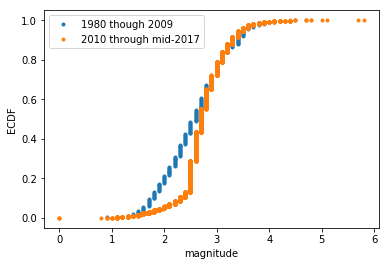

In [9]:
mags_pre = data_eq['mag'][data_eq['year'] < 2010]
mags_post = data_eq['mag'][data_eq['year'] >= 2010]

xpre, ypre = ecdf(mags_pre)
xpst, ypst = ecdf(mags_post)

_ = plt.plot(xpre, ypre, marker='.', linestyle='none')
_ = plt.plot(xpst, ypst, marker='.', linestyle='none')

_ = plt.xlabel('magnitude')
_ = plt.ylabel('ECDF')
plt.legend(('1980 though 2009', '2010 through mid-2017'), loc='upper left')
plt.show()

Both curves seem to follow the Gutenberg-Richter Law, but with different completeness thresholds, probably due to improvements in sensing capabilities in more recent years.

In [10]:
mt =3

b_pre, conf_int_pre = b_value(mags_pre, mt, perc=[2.5, 97.5], n_reps=10000)

b_post, conf_int_post = b_value(mags_post, mt, perc=[2.5, 97.5], n_reps=10000)

print("""
1980 through 2009
b-value: {0:.2f}
95% conf int: [{1:.2f}, {2:.2f}]

2010 through mid-2017
b-value: {3:.2f}
95% conf int: [{4:.2f}, {5:.2f}]
""".format(b_pre, *conf_int_pre, b_post, *conf_int_post))


1980 through 2009
b-value: 0.75
95% conf int: [0.56, 0.95]

2010 through mid-2017
b-value: 0.62
95% conf int: [0.60, 0.65]



The confidence interval for the b-value for recent earthquakes is tighter than for earlier ones because there are many more recent ones. Still, the confidence intervals overlap, and we can perform a **hypothesis test to see if we might get these results if the b-values are actually the same**

We should only include earthquakes that have magnitudes above the completeness threshold. A value of 3 is reasonable, because below the completeness threshold, we are not comparing earthquakes before and after 2010, but observed earthquakes before and after 2010. We do not have a complete data set below the completeness threshold.

We should perform a permutation test because asserting a null hypothesis that the b-values are the same implicitly assumes that the magnitudes are identically distributed, specifically Exponentially, by the Gutenberg-Richter Law, because we really are assuming the Gutenberg-Richter law holds, in part because we are only considering earthquakes above the completeness threshold. We are using a model (the G-R law) to deal with missing data. So, since both sets of quakes follow the same statistical model, and that model has a single parameter, a permutation test is appropriate.

A reasonable test statistic is the difference between the mean post-2010 magnitude and the mean pre-2010 magnitude, even though you may be thinking that the mean values are not the b-values, and that you should be using the difference in b-value as your test statistic. However, the difference in mean magnitude is directly proportional to the difference in b-value, so the result of the hypothesis test will be identical if we use b-values of mean magnitudes.

We do not need to worry about the fact that there were far fewer earthquakes before 2010 than there were after. That is to say, there are fewer earthquakes before 2010, but sufficiently many to do a permutation test, because even though they have different numbers of earthquakes, you are only interested in summary statistics about their magnitude. There were 53 earthquakes between 1980 and 2009 with magnitude 3 or greater, so we have enough to compute a reliable mean.

You do not need to worry about the fact that the two time intervals are of different length, because, provided the time interval is long enough, the b-value is independent of the time interval, just like the mean of Exponentially distributed values is independent of how many there are, provided there are not too few.

In [14]:
## Hypothesis test: are the b-values different?

# Only magnitudes above completeness threshold
mags_pre = mags_pre[mags_pre >= mt]
mags_post = mags_post[mags_post >= mt]

# Observed difference in mean magnitudes: diff_obs
diff_obs = np.mean(mags_post) - np.mean(mags_pre)

# Generate permutation replicates: perm_reps
perm_reps = draw_perm_reps(mags_post, mags_pre, diff_of_means, size=10000)

p_val = np.sum(perm_reps < diff_obs) / 10000
print('p =', p_val)

p = 0.0905


A p-value around 0.1 suggests that the observed magnitudes are commensurate with there being no change in b-value after wastewater injection began. Oklahoma has a b-value smaller than the Parkfield region, so a randomly selected earthquake above magnitude 3 in Oklahoma more likely than not has a smaller magnitude than one above magnitude 3 randomly selected from the Parkfield region.

Oklahoma has a smaller b-value than the Parkfield region, so the Parkfield region has more earthquakes>> False.                                                                                                                                

One cannot conclude information about frequency of earthquakes from the b-value alone. It is also true that from 2010-mid 2017, Oklahoma had twice as many earthquakes of magnitude 3 and higher than the entire state of California!

**Conclusion:** The frequency of EQ in Oklahoma increased over 100 times, but the magnitude of EQ didn't change much.